# Setting

In [1]:
from pf_utils import DataManager, BacktestManager, MomentumPortfolio

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'

# Universe

In [3]:
k200 = DataManager(
    file = 'kospi200_prices_240705.csv',
    #file = 'kospi200_prices_240707l.csv',
    universe = 'KOSPI200',
    path = path_data
)

### from file

In [4]:
k200.upload()
df_k200 = k200.df_prices
df_k200.tail()

200 assets from 2021-01-04 to 2024-07-05 uploaded.
df_prices updated


,005930,000660,373220,005380,207940,000270,068270,105560,005490,055550,...,105630,093370,039130,032350,178920,285130,009900,016380,005250,000670
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-01,81800,235500,347000.0,286000,759000,128600,184100,79600,370500,47850,...,19700,7480,58400,9880,27150,49200,14240,6460,14130,338500
2024-07-02,81800,232000,343500.0,272500,810000,123600,184500,83200,365500,49500,...,19460,7210,56000,9680,27600,48200,14390,6480,14010,336000
2024-07-03,81800,236000,358000.0,276000,810000,123700,181800,84400,370500,51100,...,18750,7300,55800,9550,27050,47850,14690,6410,13010,332000
2024-07-04,84600,230000,359000.0,277500,803000,125600,182900,85900,375000,52500,...,19060,7480,55700,9600,28550,48250,15170,6540,13200,336500
2024-07-05,87100,236000,357500.0,281000,803000,126300,185800,88200,377000,53500,...,19380,7670,55500,9610,27950,48350,14900,6530,13600,338000


### from web

In [5]:
k200.download(close_today=False)

Execution time of download: 0.49 secs


In [6]:
# download historicals without update of kospi200 constituents as the above failure
k200.download(tickers=df_k200.columns, close_today=False)

200 assets from 2021-01-04 to 2024-07-05 downloaded.
data/kospi200_prices_240705.csv saved.
df_prices updated
Execution time of download: 28.06 secs


In [7]:
df_k200 = k200.df_prices
df_k200.tail()

,005930,000660,373220,005380,207940,000270,068270,105560,005490,055550,...,105630,093370,039130,032350,178920,285130,009900,016380,005250,000670
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-01,81800,235500,347000.0,286000,759000,128600,184100,79600,370500,47850,...,19700,7480,58400,9880,27150,49200,14240,6460,14130,338500
2024-07-02,81800,232000,343500.0,272500,810000,123600,184500,83200,365500,49500,...,19460,7210,56000,9680,27600,48200,14390,6480,14010,336000
2024-07-03,81800,236000,358000.0,276000,810000,123700,181800,84400,370500,51100,...,18750,7300,55800,9550,27050,47850,14690,6410,13010,332000
2024-07-04,84600,230000,359000.0,277500,803000,125600,182900,85900,375000,52500,...,19060,7480,55700,9600,28550,48250,15170,6540,13200,336500
2024-07-05,87100,236000,357500.0,281000,803000,126300,185800,88200,377000,53500,...,19380,7670,55500,9610,27950,48350,14900,6530,13600,338000


# BacktestManager

## create class

In [9]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [10]:
bm.util_check_days_in_year(freq='Y').agg(['mean', 'min', 'max'])

mean    246.0
min     246.0
max     246.0
dtype: float64

## define strategy by keywords

In [11]:
kwargs_build = dict(
    name = 'strategy1',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

In [12]:
kwargs_build = dict(
    name = 'strategy2',
    freq = 'M', select = 'Momentum', weigh = 'equally',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

*you could use build_batch instead*

In [13]:
kwargs_build = dict(
    freq = 'M', select = 'Momentum',
    n_assets=5, lookback=12, lag=0
)
kwa_list = [
    {'name':'strategy1', 'weigh':'ERC'},
    {'name':'strategy2', 'weigh':'equally'}
]
bm.build_batch(*kwa_list, **kwargs_build)

## buy and hold

In [14]:
bm.buy_n_hold('buy&hold', weights='005930')

RunOnce selected


## baseline

In [15]:
name = 'KOSPI'
ticker = '069500'
df_kospi = bm.util_import_data(ticker, name=name)

In [16]:
bm.benchmark(df_kospi)

RunOnce selected


## run backtest

Backtesting 4 strategies: strategy1, strategy2, buy&hold, KOSPI


100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 79512.87it/s]

Returning stats


,strategy1,strategy2,buy&hold,KOSPI
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.570494,0.566191,0.01381,0.016695
monthly_vol,0.464725,0.487065,0.226671,0.185975
monthly_sharpe,1.189276,1.143812,0.186532,0.157682
max_drawdown,-0.251567,-0.255969,-0.420438,-0.342432
avg_drawdown,-0.072797,-0.074728,-0.22031,-0.08767
avg_drawdown_days,24.90625,25.741935,636.0,210.666667


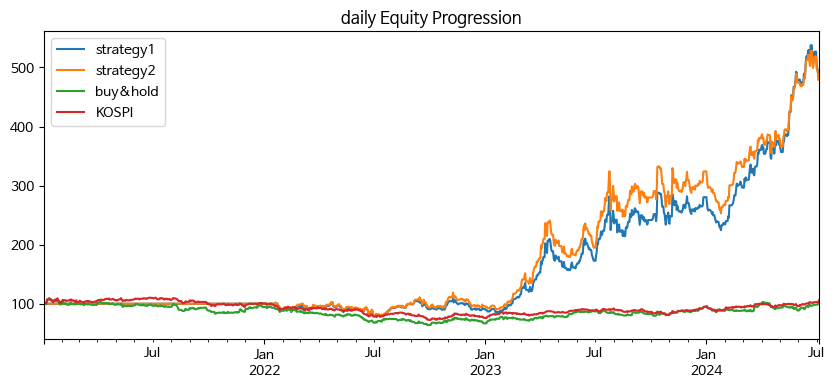

In [19]:
bm.run(figsize=(10,4), metrics=metrics2)

## define strategy for debugging or more combinations

In [20]:
import bt
import pandas as pd

name='WeighERC does not work with SelectRandomly'

algos = [
    bt.algos.SelectAll(),

    bt.algos.SelectRandomly(n=5),
    #bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(months=12)),
    
    bt.algos.RunMonthly(),

    #bt.algos.SelectHasData(lookback=pd.DateOffset(months=12)),
    bt.algos.WeighERC(lookback=pd.DateOffset(months=12)),
    #bt.algos.WeighEqually(),
    
    bt.algos.Rebalance()
]

bm4d = BacktestManager(df_k200, **kwargs_bm)
bm4d.build(name=name, algos=algos)
_ = bm4d.run(figsize=(10,4))

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Backtesting 1 strategies: WeighERC does not work with SelectRandomly


  0%|                                                                         | 0/1 [00:00<?, ?it/s]

ERROR: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LedoitWolf.


## Post-processing

In [21]:
bm.get_stats(sort_by='monthly_sharpe')

,strategy1,strategy2,buy&hold,KOSPI
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,3.858051,3.811608,0.0492,0.05969
cagr,0.570494,0.566191,0.01381,0.016695
calmar,2.267758,2.211955,0.032847,0.048753
max_drawdown,-0.251567,-0.255969,-0.420438,-0.342432
avg_drawdown,-0.072797,-0.074728,-0.22031,-0.08767
avg_drawdown_days,24.90625,25.741935,636.0,210.666667
daily_vol,0.396943,0.405518,0.225523,0.17209
daily_sharpe,1.357287,1.330014,0.173979,0.184019


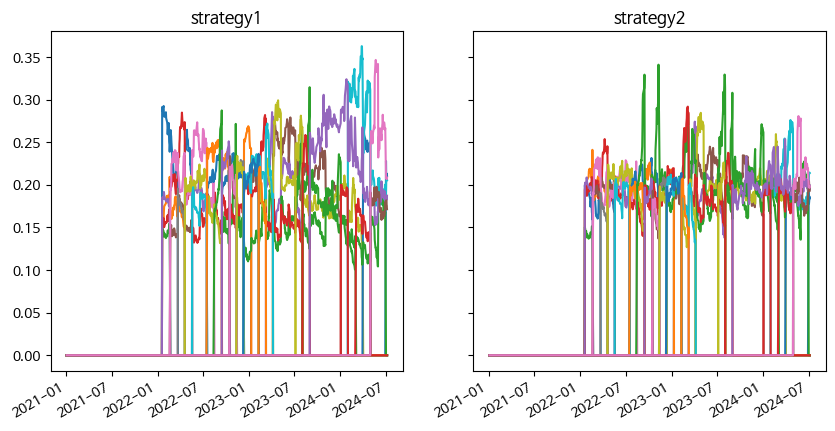

In [22]:
pf = ['strategy1', 'strategy2']
bm.plot_security_weights(pf, legend=False)

In [23]:
bm.get_historical(pf).tail()

,strategy1,strategy2
2024-07-01,504.26411,498.29481
2024-07-02,498.01811,494.31881
2024-07-03,494.80611,490.62481
2024-07-04,483.35111,478.70681
2024-07-05,485.80511,481.16081


In [24]:
bm.get_transactions(pf[1]).tail(10)

strategy2: transactions returned


price  quantity
Date       Security                    
2024-05-31 003230    529000.0      -8.0
           010120    213500.0       2.0
           022100     35350.0      82.0
           042700    161700.0       2.0
           267260    301000.0       1.0
2024-07-01 003230    615000.0      -1.0
           010120    204500.0       4.0
           022100     38750.0    -268.0
           079550    221000.0      45.0
           267260    296500.0       2.0

In [25]:
bm.get_security_weights(pf[1], stack=True)

strategy2: weights at transactions returned


Date              
2022-01-19  138040    0.199290
            052690    0.194220
            298050    0.150300
            066970    0.194100
            005070    0.199934
                        ...   
2024-07-01  079550    0.199581
            267260    0.196360
            042700    0.198806
            010120    0.196992
            003230    0.197473
Name: weight, Length: 155, dtype: float64

In [26]:
bm.get_balance(pf[0])

strategy1: quantity of securities on 2024-07-01 returned


Security
003230    17
010120    43
042700    55
079550    52
267260    32
Name: volume, dtype: int64

# Momentum

### Casestudy

In [29]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246,
    metrics = metrics2
)

#### Lookback

In [30]:
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [31]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    #lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} month lookback', 'lookback':x} for x in [3, 6, 12, 24]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: 3 month lookback, 6 month lookback, 12 month lookback, 24 month lookback


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.08s/it]

Returning stats


,3 month lookback,6 month lookback,12 month lookback,24 month lookback
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.332121,0.343583,0.570494,0.630283
monthly_vol,0.460514,0.484774,0.464725,0.508505
monthly_sharpe,0.831357,0.812015,1.189276,1.167679
max_drawdown,-0.493807,-0.355224,-0.251567,-0.275158
avg_drawdown,-0.112853,-0.115337,-0.072797,-0.064668
avg_drawdown_days,69.25,64.1875,24.90625,15.857143


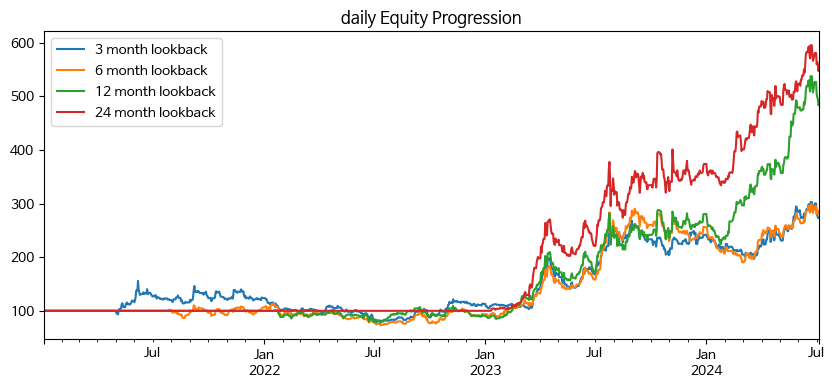

In [32]:
bm.run(figsize=(10,4))

#### Lag

In [33]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [34]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    lookback = 12,
    #lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} day lag', 'lag':x} for x in [0, 5, 10, 20]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: 0 day lag, 5 day lag, 10 day lag, 20 day lag


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.32s/it]


Returning stats


,0 day lag,5 day lag,10 day lag,20 day lag
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.363688,0.366696,0.33587,0.325681
monthly_vol,0.359611,0.369647,0.366401,0.350388
monthly_sharpe,1.037557,1.024079,0.968651,0.976347
max_drawdown,-0.524263,-0.51659,-0.577036,-0.526307
avg_drawdown,-0.064646,-0.066529,-0.062222,-0.067133
avg_drawdown_days,44.116505,45.39,48.666667,44.45098


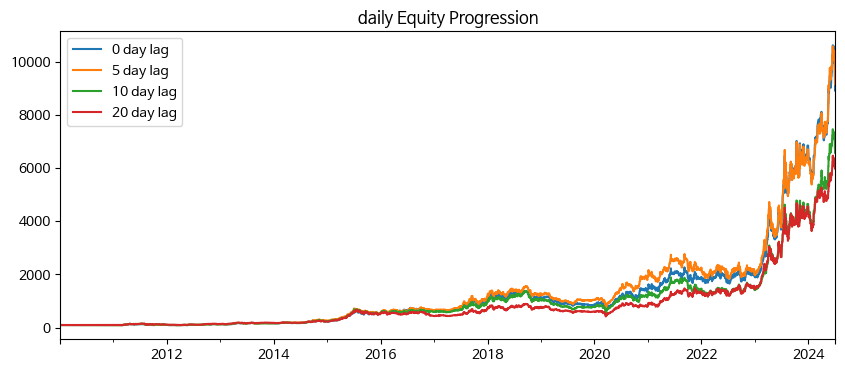

In [35]:
bm.run(figsize=(10,4))

#### Number of assets

In [36]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [37]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    #n_assets = 5,
    lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} assets', 'n_assets':x} for x in [2, 5, 10]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: 2 assets, 5 assets, 10 assets


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.33s/it]

Returning stats


,2 assets,5 assets,10 assets
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.475184,0.363688,0.258254
monthly_vol,0.522119,0.359611,0.311596
monthly_sharpe,0.982554,1.037557,0.884751
max_drawdown,-0.630243,-0.524263,-0.479316
avg_drawdown,-0.091398,-0.064646,-0.061579
avg_drawdown_days,50.888889,44.116505,54.352941


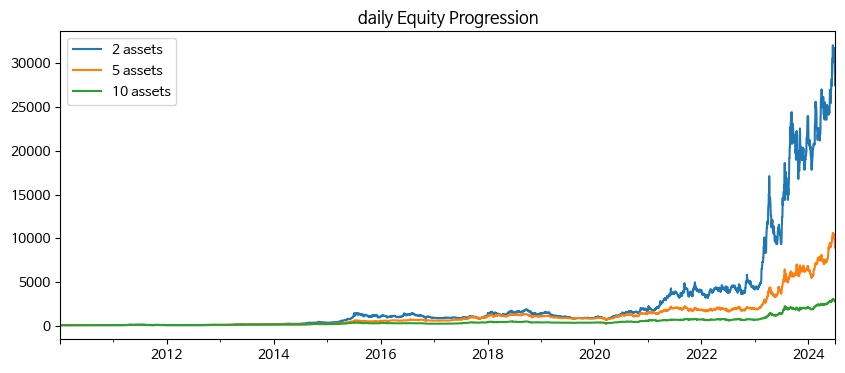

In [38]:
bm.run(figsize=(10,4))

#### Freq

In [39]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [40]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    lookback = 12,
    lag = 0,
    #freq='M'
)

kwa_list = [{'name':f'freq {x}', 'freq':x} for x in [10, 'M', 42, 'Q']]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: freq 10, freq M, freq 42, freq Q


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.25s/it]

Returning stats


,freq 10,freq M,freq 42,freq Q
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.36852,0.363688,0.386991,0.383722
monthly_vol,0.354079,0.359611,0.360538,0.348175
monthly_sharpe,1.060135,1.037557,1.085257,1.107089
max_drawdown,-0.489099,-0.524263,-0.537375,-0.471833
avg_drawdown,-0.065941,-0.064646,-0.061435,-0.064778
avg_drawdown_days,42.896226,44.116505,37.099174,41.924528


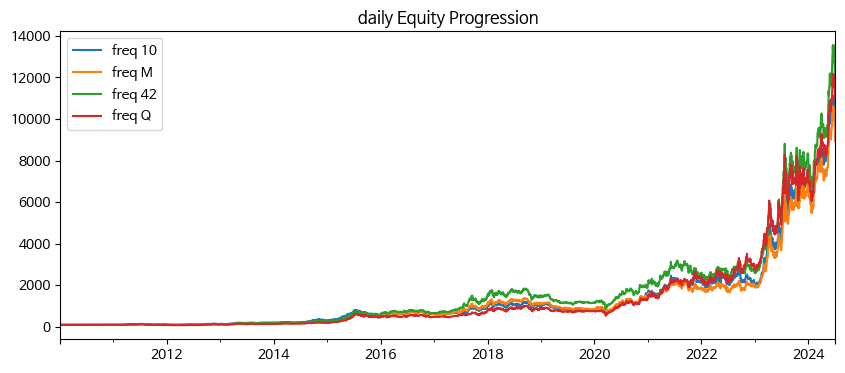

In [41]:
bm.run(figsize=(10,4))

#### Weights

In [42]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [43]:
kwargs_build = dict(
    select = 'Momentum', 
    freq='M', n_assets=5, lookback=12, lag=0
)
kwa_list = [{'name':x, 'weigh':x} for x in ['ERC', 'InvVol']]
bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 2 strategies: ERC, InvVol


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.20s/it]

Returning stats


,ERC,InvVol
start,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.363688,0.36582
monthly_vol,0.359611,0.355249
monthly_sharpe,1.037557,1.052083
max_drawdown,-0.524263,-0.529421
avg_drawdown,-0.064646,-0.060261
avg_drawdown_days,44.116505,39.736842


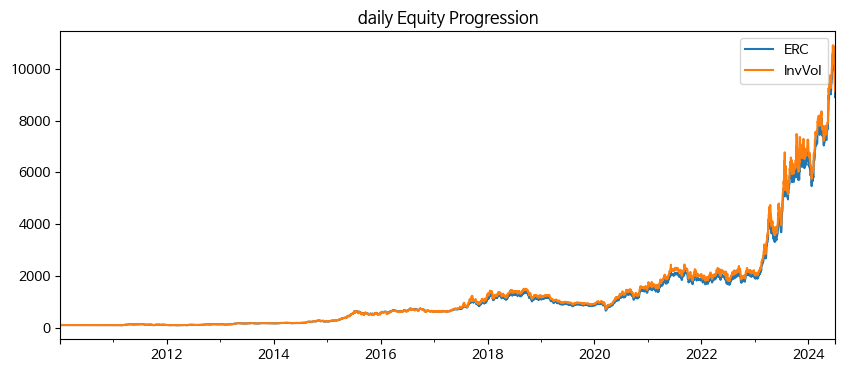

In [44]:
bm.run(figsize=(10,4))

## K-ratio

### Historicals

In [5]:
days_in_year = 247
mp_k200 = MomentumPortfolio(df_k200, days_in_year)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


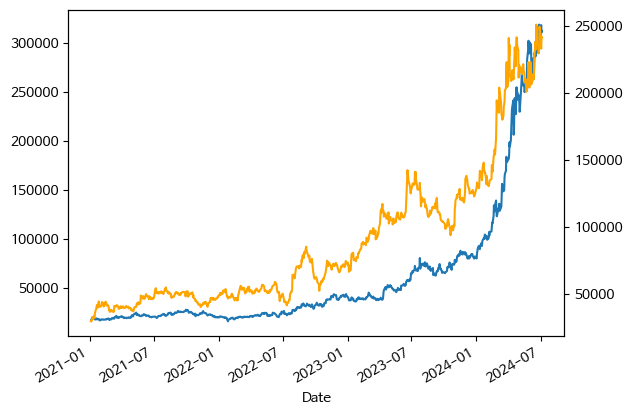

In [6]:
top_simple = mp_k200.select().index[0]
top_kratio = mp_k200.select(method='k-ratio').index[0]

ax = df_k200[top_simple].plot()
_ = df_k200[top_kratio].plot(ax=ax.twinx(), color='orange')

### Lookback

In [7]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [8]:
kwargs_build = dict(
    select = 'K-ratio', weigh = 'ERC',
    freq='M', n_assets=5, lag=0
)
kwa_list = [{'name':f'K-ratio: lookback {x}M', 'lookback':x} for x in [3, 6, 12]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: K-ratio: lookback 3M, K-ratio: lookback 6M, K-ratio: lookback 12M


100%|█████████████████████████████████████████████████████████████████| 3/3 [03:26<00:00, 68.81s/it]

Returning stats
CPU times: user 3min 26s, sys: 74.5 ms, total: 3min 26s
Wall time: 3min 26s


,K-ratio: lookback 3M,K-ratio: lookback 6M,K-ratio: lookback 12M
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,-0.34361,0.355772,1.806403
cagr,-0.113281,0.09081,0.342704
calmar,-0.236511,0.311492,1.637791
max_drawdown,-0.478965,-0.291533,-0.209248
avg_drawdown,-0.25223,-0.081242,-0.036947
avg_drawdown_days,577.5,102.4,24.90625
daily_vol,0.235497,0.224299,0.241461
daily_sharpe,-0.402982,0.507263,1.365957


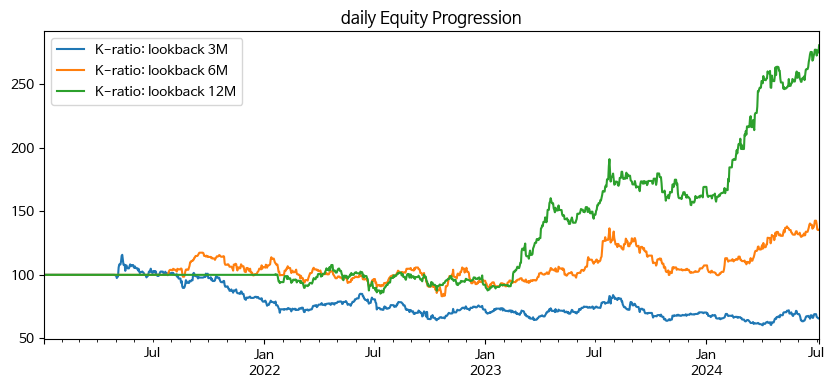

In [9]:
%%time
bm.run(figsize=(10,4))

### Compare with Simple

In [12]:
kwargs_build = dict(
    name='Simple', select = 'Momentum', weigh = 'ERC',
    freq='M', n_assets=5, lookback=12
)
bm.build(**kwargs_build)

Backtesting 2 strategies: Simple, K-ratio: lookback 12M


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]

Returning stats


,K-ratio: lookback 12M,Simple
start,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,1.806403,3.858051
cagr,0.342704,0.570494
calmar,1.637791,2.267758
max_drawdown,-0.209248,-0.251567
avg_drawdown,-0.036947,-0.072797
avg_drawdown_days,24.90625,24.90625
daily_vol,0.241461,0.396943
daily_sharpe,1.365957,1.357287


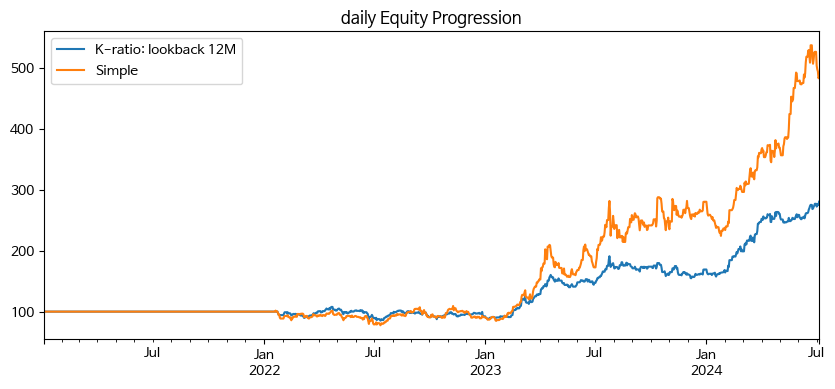

In [13]:
pf_list = ['Simple', 'K-ratio: lookback 12M']
bm.run(pf_list, figsize=(10,4))

#### cross-validation

In [14]:
bm.cv_strategies

0) K-ratio: lookback 3M
1) K-ratio: lookback 6M
2) K-ratio: lookback 12M
3) Simple

In [15]:
pf_list = [2,3]
bm.cross_validate(pf_list, n_sample=10)

Cross-validating 2 strategies: K-ratio: lookback 12M, Simple


100%|███████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.17s/it]


,K-ratio: lookback 12M,Simple
avg_drawdown,-0.04 ± 0.007,-0.07 ± 0.004
avg_drawdown_days,29.81 ± 8.309,24.53 ± 3.339
cagr,0.26 ± 0.057,0.63 ± 0.081
calmar,1.07 ± 0.369,2.33 ± 0.351
daily_sharpe,1.10 ± 0.197,1.46 ± 0.131
daily_sortino,1.86 ± 0.358,2.60 ± 0.225
daily_vol,0.24 ± 0.004,0.40 ± 0.003
max_drawdown,-0.25 ± 0.036,-0.27 ± 0.022
monthly_sharpe,0.97 ± 0.163,1.19 ± 0.086
monthly_sortino,2.26 ± 0.639,4.15 ± 0.520


# ETF

In [3]:
days_in_year = 246

## Data

In [4]:
etf = DataManager(
    file = 'etfs_all_240705.csv',
    universe = 'ETF',
    path = path_data
)
etf.upload()

864 assets from 2021-01-04 to 2024-07-05 uploaded.
df_prices updated


## Backtest

In [8]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = days_in_year
)

In [13]:
df_etfs = etf.df_prices
#df_etfs = etf.df_prices.loc['2023-01-01':]

bm = BacktestManager(df_etfs, **kwargs_bm)

454 assets removed for shorter periods (52.5%)
running self.util_check_days_in_year to check days in a year


In [14]:
bm.benchmark_ticker()

RunOnce selected


In [15]:
kwa_list = [{'name':f'freq {x}', 'freq':x} for x in ['M', 'Q', 'Y']]

kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets=5, lookback=12, lag=0
)

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: KOSPI, freq M, freq Q, freq Y


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.04s/it]

Returning stats


,KOSPI,freq M,freq Q,freq Y
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,0.05969,-0.201823,0.083767,-0.087444
cagr,0.016695,-0.062347,0.023238,-0.025793
calmar,0.048753,-0.128783,0.057214,-0.082332
max_drawdown,-0.342432,-0.484125,-0.406166,-0.313286
avg_drawdown,-0.08767,-0.10563,-0.128965,-0.313286
avg_drawdown_days,210.666667,126.142857,201.0,549.0
daily_vol,0.17209,0.219804,0.250394,0.152521
daily_sharpe,0.184019,-0.188611,0.217313,-0.098459


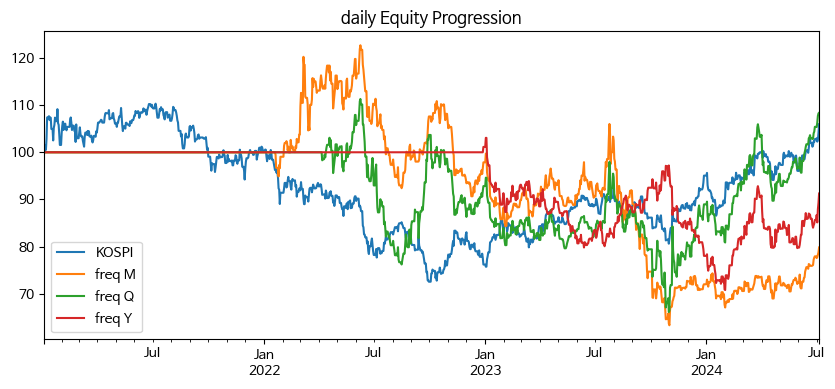

In [16]:
bm.run(figsize=(10,4))

In [17]:
kwargs_build = dict(
    name = 'K-ratio',
    freq = 'Q', select = 'K-ratio', weigh = 'ERC',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

In [18]:
bm.portfolios

0) KOSPI
1) freq M
2) freq Q
3) freq Y
4) K-ratio

Backtesting 3 strategies: KOSPI, freq Q, K-ratio


100%|█████████████████████████████████████████████████████████████████| 3/3 [02:32<00:00, 50.67s/it]

Returning stats


,KOSPI,freq Q,K-ratio
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,0.05969,0.083767,0.068298
cagr,0.016695,0.023238,0.019046
calmar,0.048753,0.057214,17.888037
max_drawdown,-0.342432,-0.406166,-0.001065
avg_drawdown,-0.08767,-0.128965,-0.000144
avg_drawdown_days,210.666667,201.0,3.487805
daily_vol,0.17209,0.250394,0.001979
daily_sharpe,0.184019,0.217313,9.729


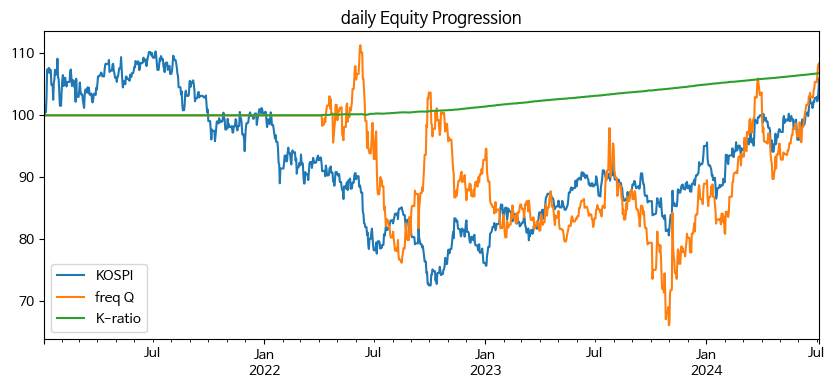

In [19]:
bm.run([0, 2, 4], figsize=(10,4))

In [26]:
df = bm.get_transactions(2)

K-ratio: transactions returned


,price,quantity
Security,,
157450,100735.0,24.0
190620,95560.0,25.0
196230,105020.0,23.0
357870,50730.0,47.0
373790,13051.0,14.0


<Axes: xlabel='Date'>

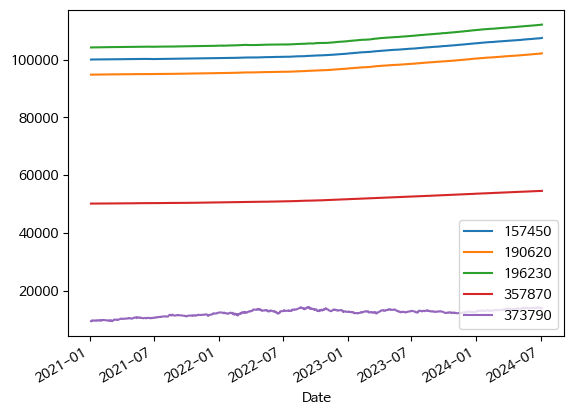

In [28]:
cols = df.loc['2022-04-06'].index
bm.df_assets[cols].plot()